In this short programming assignment we will look into applications of word embeddings in similarity search and nearest neighbors. We will also look at creating a video based on tSNE embeddings of images.

## -1. Create a video from images
Download any 1000 or more 'appropriate' and publicly available images from the web. This could be part of a data set or something specific that you picked up or are interested in.

We discussed using tSNE to find image embeddings for these images. Apply the tSNE library to these images and construct low-dimensional embeddings for the images. Use these embeddings to then:

a) Start at any random image in the data set 

b) Sequentially chain the next image to the previous image using a scoring function/probability based on the tSNE embedding. So you want to chain the most similar image to the current one and so on. Choose a frame rate that is appropriate to convert this chain of images into a video. Your video shouldn't be more than 3 minutes long.

c) Upload this video to youtube and share a link with your submission. 

d) Feel free to share your video to Discord to see what cool videos we come up with!

In [ ]:
# Overall steps
# read each image
# convert to rgb
# resize to 200,200
# (100images,120k features)through tsne
# use pca to lower the dimension and then put tsne

In [53]:
from keras.datasets import mnist

In [122]:
import numpy as np
import pandas as pd

from keras.datasets import mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [170]:
print('X_train: ' + str(x_train.shape))
print('X_train: ' + str(y_train.shape))
print('X_train: ' + str(x_test.shape))
print('X_train: ' + str(y_test.shape))


X_train: (60000, 28, 28)
X_train: (60000,)
X_train: (10000, 28, 28)
X_train: (10000,)


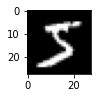

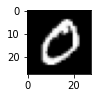

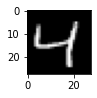

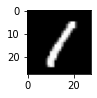

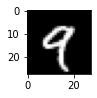

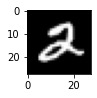

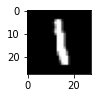

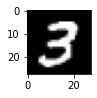

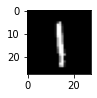

In [57]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [123]:
X = np.zeros((x_train.shape[0], 784))

In [124]:
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()

In [125]:
X = pd.DataFrame(X)
X.shape

(60000, 784)

In [126]:
X.shape[1]

784

In [112]:
Y = pd.DataFrame(y_train)
Y.head()

,0
0,5
1,0
2,4
3,1
4,9


In [113]:
df = X

In [109]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 587.4474487304688 seconds


In [114]:
df['label'] = Y

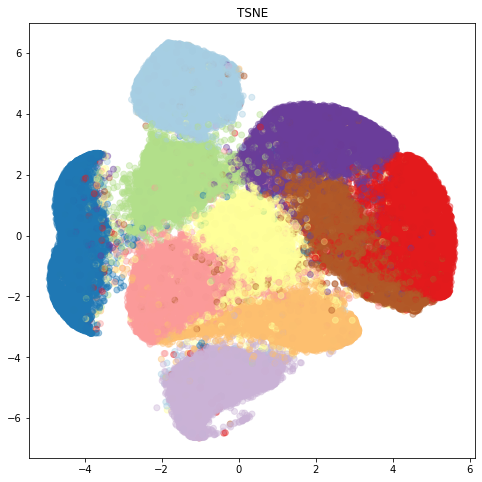

In [115]:
# Plotting TSNE

import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=df['label'],  
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()



From the image above we can see that all the 10 classes in MNIST are being clustered well with few outliers



# using PCA

In [128]:
from sklearn.decomposition import PCA

In [132]:
import matplotlib.pyplot as plt

In [129]:
pca = PCA(n_components=2) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape


(60000, 2)

In [138]:
principal_df

,principal component 1,principal component 2
0,123.936061,-312.614241
1,1011.717952,-294.830600
2,-51.849746,392.155007
3,-799.127458,-607.199484
4,-382.755505,730.540994
...,...,...
59995,-99.624055,-293.540878
59996,152.758411,-687.900618
59997,-178.052405,160.076919
59998,130.607248,-5.565477


In [130]:
# Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09704664 0.07095924]


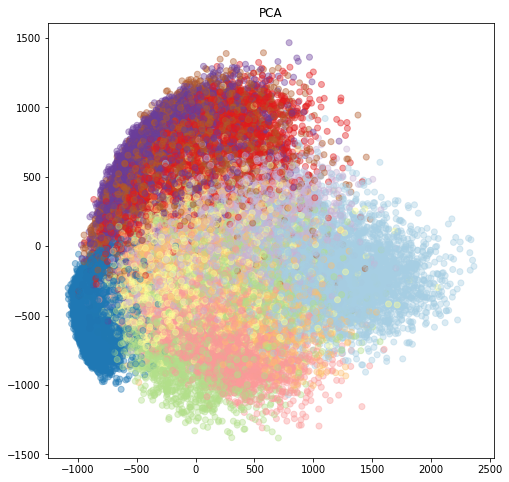

In [137]:
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='PCA' )
ax.scatter(
    x = principalComponents[:, 0], 
    y = principalComponents[:, 1],
    c=df['label'],  
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()

In [148]:
pca_50 = PCA(n_components=50) # project from 784 to 2 dimensions
principalComponents_50 = pca_50.fit_transform(X)


In [149]:
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8246220503588447


The first 50 components roughly hold around 82% of the total variation in the data.

# Feeding the above data into the t-SNE algorithm

In [150]:
time_start = time.time()
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(principalComponents_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 409.67867064476013 seconds


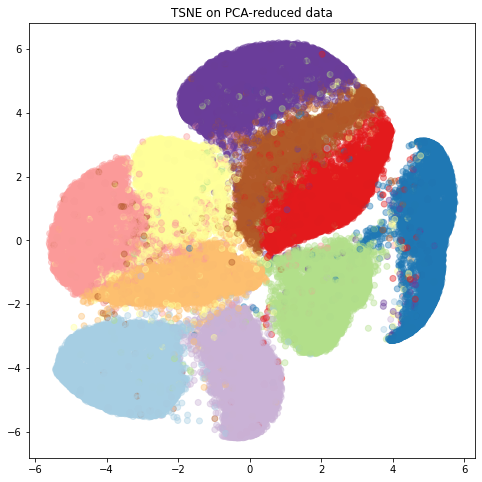

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE on PCA-reduced data' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=df['label'],  
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

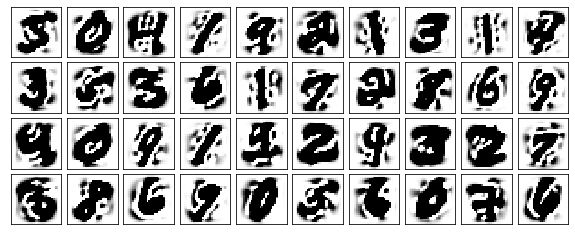

In [161]:
#components = pca.transform(train_X)
filtered = pca.inverse_transform(principalComponents)
plot_digits(filtered)

In [180]:
filtered.shape

(60000, 784)

Good reconstruction from PCA which can be used for video further

Trying to create video

In [172]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

In [ ]:
fig_1 = plot_digits(filtered)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for i in images500):
    frames.append([plt.imshow(img[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
# ani.save('movie.mp4')
plt.show()

In [196]:
cap = cv2.VideoCapture(0)

In [ ]:
from pandas.core.resample import f
fps = 20
#size =. (28,28)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('numbers.avi',fourcc, fps, (28,28),0)
for i in filtered:
  frame = img[i].reshape(28,28)
  out.write(frame)
  out.release()

## Diving into Cheat Sheet of Pandas Data Frame
There are some useful functions for solving problems below when it comes to index and slice data frames. Let's go over them.
More materials can be found here: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
1. DataFrame() Construct a dataframe. Use it for putting a numpy ndarray into a dataframe.
1. DataFrame.loc() Purely label-location based indexer for selection by label. Use it for selecting word vectors in the dataframe.     
1. DataFrame.dot() Matrix multiplication with DataFrame. Use it for dot product of word vectors.
1. DataFrame.sort_values() Sort by the values along either axis. Use it for sorting distance short to long.

Below are examples of using these functions. You don't have to code anything in this block, just focus on understanding the functions and how it works in pandas.

In [1]:
import pandas as pd
import numpy as np

# Define a ndarray
d = np.array([[0.1,0.3,0.4,0.5],[0.3,0.4,0.9,0.5],[0.2,0.8,0.7,0.5]], dtype=float, order='F')
print("Define sample word vectors")
print(d)
#Construct a dataframe from ndarray and index each row as word vectors
df = pd.DataFrame(d,index = ['word1','word2','word3'])
print("\nPandas Data Frame for word vectors")
print(df)
#Select word vector1 by its label
print("\nFind the row corresponding to word1")
print(df.loc['word1'])
#Calculate dot product of word vector1 and word vector2
print("\nCalculate the dot product between word1 and word2")
dot_product = df.loc['word2'].dot(df.loc['word1'])
print(dot_product)
#Calculate dot product of word vector1 to the rest of words
print("\nCalculate the dot product between word1 and rest of the words")
words_rest = ['word2','word3']
dot_product2 = df.loc[words_rest].dot(df.loc['word1'])
print(dot_product2)
#Sort Values of dot_product2 by high to low
print("\nSorted dot product values")
print(dot_product2.sort_values(ascending = False))

Define sample word vectors
[[0.1 0.3 0.4 0.5]
 [0.3 0.4 0.9 0.5]
 [0.2 0.8 0.7 0.5]]

Pandas Data Frame for word vectors
         0    1    2    3
word1  0.1  0.3  0.4  0.5
word2  0.3  0.4  0.9  0.5
word3  0.2  0.8  0.7  0.5

Find the row corresponding to word1
0    0.1
1    0.3
2    0.4
3    0.5
Name: word1, dtype: float64

Calculate the dot product between word1 and word2
0.76

Calculate the dot product between word1 and rest of the words
word2    0.76
word3    0.79
dtype: float64

Sorted dot product values
word3    0.79
word2    0.76
dtype: float64


## Dataset Details - Standford's GloVe pre-trained word vectors

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus. The GloVe pre-trained word vectors dataset contains English word vectors pre-trained on the combined Wikipedia 2014 + Gigaword 5th Edition corpora (6B tokens, 400K vocab). All tokens are in lowercase. This dataset contains 50-dimensional, 100-dimensional and 200-dimensional pre trained word vectors. In this problem we are going to use the 50-dimensional dataset. 

## \# 0. Get an overview on what Glove is
Read up the documentation on glove embeddings, esp. where it gets applied here: https://nlp.stanford.edu/projects/glove/

## Load Dataset
Let's load the dataset first. Each row is indexed as a word vector. Dimension of word vectors is 50. How many words are there in this dataset? Print a few words and see what they are. You don't need to code anything here, just understand the data structure.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [254]:
import pandas as pd
import numpy as np
import csv

# Load GloVe pre-trained vectors 
local_file1="/content/drive/MyDrive/Winter_22/Adv_ML/glove.6B.50d.txt" # Make sure this file exists!
df = pd.read_csv(local_file1,sep=' ',index_col=0,header=None,engine='python',error_bad_lines=False, quoting =csv.QUOTE_NONE)
print("dataset shape - Rows: %d, Cols: %d" % (df.shape[0], df.shape[1]))
words = list(df.index)
print("print a few words in the dataset:", words[30:40])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


dataset shape - Rows: 400000, Cols: 50
print a few words in the dataset: ['be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they']


## \# 1. Print the first few 11 rows of the pandas data frame below

In [4]:
# Your code HERE - It should execute as expected! 
df[0:11]
# (Search for a pandas functionality that can help you do this!)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
the,0.418000,0.249680,-0.41242,0.121700,0.345270,-0.044457,-0.49688,-0.178620,-0.000660,-0.656600,0.278430,-0.147670,-0.55677,0.146580,-0.00951,0.011658,0.102040,-0.127920,-0.84430,-0.121810,-0.016801,-0.332790,-0.155200,-0.231310,-0.191810,-1.8823,-0.767460,0.099051,-0.421250,-0.195260,4.0071,-0.185940,-0.522870,-0.316810,0.000592,0.007445,0.177780,-0.158970,0.012041,-0.054223,-0.298710,-0.157490,-0.347580,-0.045637,-0.442510,0.187850,0.002785,-0.184110,-0.115140,-0.785810
",",0.013441,0.236820,-0.16899,0.409510,0.638120,0.477090,-0.42852,-0.556410,-0.364000,-0.239380,0.130010,-0.063734,-0.39575,-0.481620,0.23291,0.090201,-0.133240,0.078639,-0.41634,-0.154280,0.100680,0.488910,0.312260,-0.125200,-0.037512,-1.5179,0.126120,-0.024420,-0.042961,-0.283510,3.5416,-0.119560,-0.014533,-0.149900,0.218640,-0.334120,-0.138720,0.318060,0.703580,0.448580,-0.080262,0.630030,0.321110,-0.467650,0.227860,0.360340,-0.378180,-0.566570,0.044691,0.303920
.,0.151640,0.301770,-0.16763,0.176840,0.317190,0.339730,-0.43478,-0.310860,-0.449990,-0.294860,0.166080,0.119630,-0.41328,-0.423530,0.59868,0.288250,-0.115470,-0.041848,-0.67989,-0.250630,0.184720,0.086876,0.465820,0.015035,0.043474,-1.4671,-0.303840,-0.023441,0.305890,-0.217850,3.7460,0.004228,-0.184360,-0.462090,0.098329,-0.119070,0.239190,0.116100,0.417050,0.056763,-0.000064,0.068987,0.087939,-0.102850,-0.139310,0.223140,-0.080803,-0.356520,0.016413,0.102160
of,0.708530,0.570880,-0.47160,0.180480,0.544490,0.726030,0.18157,-0.523930,0.103810,-0.175660,0.078852,-0.362160,-0.11829,-0.833360,0.11917,-0.166050,0.061555,-0.012719,-0.56623,0.013616,0.228510,-0.143960,-0.067549,-0.381570,-0.236980,-1.7037,-0.866920,-0.267040,-0.258900,0.176700,3.8676,-0.161300,-0.132730,-0.688810,0.184440,0.005246,-0.338740,-0.078956,0.241850,0.365760,-0.347270,0.284830,0.075693,-0.062178,-0.389880,0.229020,-0.216170,-0.225620,-0.093918,-0.803750
to,0.680470,-0.039263,0.30186,-0.177920,0.429620,0.032246,-0.41376,0.132280,-0.298470,-0.085253,0.171180,0.224190,-0.10046,-0.436530,0.33418,0.678460,0.057204,-0.344480,-0.42785,-0.432750,0.559630,0.100320,0.186770,-0.268540,0.037334,-2.0932,0.221710,-0.398680,0.209120,-0.557250,3.8826,0.474660,-0.956580,-0.377880,0.208690,-0.327520,0.127510,0.088359,0.163510,-0.216340,-0.094375,0.018324,0.210480,-0.030880,-0.197220,0.082279,-0.094340,-0.073297,-0.064699,-0.260440
and,0.268180,0.143460,-0.27877,0.016257,0.113840,0.699230,-0.51332,-0.473680,-0.330750,-0.138340,0.270200,0.309380,-0.45012,-0.412700,-0.09932,0.038085,0.029749,0.100760,-0.25058,-0.518180,0.345580,0.449220,0.487910,-0.080866,-0.101210,-1.3777,-0.108660,-0.232010,0.012839,-0.465080,3.8463,0.313620,0.136430,-0.522440,0.330200,0.337070,-0.356010,0.324310,0.120410,0.351200,-0.069043,0.368850,0.251680,-0.245170,0.253810,0.136700,-0.311780,-0.632100,-0.250280,-0.380970
in,0.330420,0.249950,-0.60874,0.109230,0.036372,0.151000,-0.55083,-0.074239,-0.092307,-0.328210,0.095980,-0.822690,-0.36717,-0.670090,0.42909,0.016496,-0.235730,0.128640,-1.09530,0.433340,0.570670,-0.103600,0.204220,0.078308,-0.427950,-1.7984,-0.278650,0.119540,-0.126890,0.031744,3.8631,-0.177860,-0.082434,-0.626980,0.264970,-0.057185,-0.073521,0.461030,0.308620,0.124980,-0.486090,-0.008027,0.031184,-0.365760,-0.426990,0.421640,-0.116660,-0.507030,-0.027273,-0.532850
a,0.217050,0.465150,-0.46757,0.100820,1.013500,0.748450,-0.53104,-0.262560,0.168120,0.131820,-0.249090,-0.441850,-0.21739,0.510040,0.13448,-0.431410,-0.031230,0.206740,-0.78138,-0.201480,-0.097401,0.160880,-0.618360,-0.185040,-0.124610,-2.2526,-0.223210,0.504300,0.322570,0.153130,3.9636,-0.713650,-0.670120,0.283880,0.217380,0.144330,0.259260,0.234340,0.427400,-0.444510,0.138130,0.369730,-0.642890,0.024142,-0.039315,-0.260370,0.120170,-0.043782,0.410130,0.179600
"""",0.257690,0.456290,-0.76974,-0.376790

## \# 2. Words Similarity

Similar words have similar embeddings (or vector values). We can use cosine similarity i.e. cos(u,v) = u.v/(|u||v|) to measure vector similarity. u.v is dot product of vectors, |u| is L2 norm of u. Remember, we spoke about computing similarity based on cosine-similarity (as another alternative to correlation) in class?

1. Normalize matrix df by norm of word vectors. 
1. Define a function to find words similarity to a given word.
1. Use the function defined to find the word in examples that is most similar to "happy".

In [264]:
## YOUR CODE HERE
# 1a. Calculate norm of word vectors
# What would be the dimension of the vector_norm array?
vector_norm = np.linalg.norm(df, axis=1)  # (399694,) shape

# 1b. Normalize matrix df by norm using .div()
dfn = df.divide(vector_norm[:, np.newaxis])

# 2. Define a function to find words similar to a given word in a normalized dataframe
def find_word_similarity(word, examples, dataframe, viz=True):
    # Input: word - one string
    #        examples - List of strings
    #        dataframe - An indexed normalized dataframe
    ## YOUR CODE HERE
    # Calculate dot product of each word in examples to the given word, sorted by value high to low
    # Once you have the sorted values of dot products 
    #(notice because of normalization, the dot product is the cosine similarity!),
    # obtain the words corresponding to the sorted values and call it similar_words
    word_vec = dataframe.loc[word]
    examples_vecs = dataframe.loc[examples]
    dotproducts = (examples_vecs.dot(word_vec))
    indices = np.argsort(dotproducts.values)[::-1]
    similar_words = (dotproducts.iloc[indices].index.values)
    if viz: print(dotproducts.loc[similar_words])

    # Return words similar to the given word
    return similar_words
    
examples = ["sad", "bad", "evil", "healthy", "ill",
            "beaming", "cheerful", "joyful", "radiant", "glad", "upset",
            "disco", "probably", "hardly", "ephemeral", "close", "cleaning", 
            "maths", "word", "distribution"]

# 3.
# Use above function to calculate examples' similarity to happy (both "happy" and words in examples are in dfn)
print(find_word_similarity("happy", examples, dfn))

0
glad            0.865877
hardly          0.816272
probably        0.747581
bad             0.708395
sad             0.689063
healthy         0.640579
word            0.599150
cheerful        0.575719
upset           0.566424
joyful          0.555032
close           0.554029
ill             0.522978
evil            0.452148
disco           0.324669
beaming         0.289510
cleaning        0.246022
distribution    0.160149
radiant         0.134971
ephemeral       0.132886
maths          -0.011991
dtype: float64
['glad' 'hardly' 'probably' 'bad' 'sad' 'healthy' 'word' 'cheerful'
 'upset' 'joyful' 'close' 'ill' 'evil' 'disco' 'beaming' 'cleaning'
 'distribution' 'radiant' 'ephemeral' 'maths']


In sklean library,there is a cosine_similarity fuction that directly calcualtes vectors similarity (you don't need to normalize vectors first). Let's use this function to calculate similarity again to confirm we get same results. 
For more information, please see here: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

In [6]:
examples = ["sad", "bad", "evil", "healthy", "ill",
            "beaming", "cheerful", "joyful", "radiant", "glad", "upset",
            "disco", "probably", "hardly", "ephemeral", "close", "cleaning", 
            "maths", "word", "distribution"]

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
similarity2 = pd.DataFrame(cosine_similarity(np.array(df.loc['happy']).reshape(1,50),np.array(df.loc[examples])),columns = examples)
print(similarity2.T)

                     0
sad           0.689063
bad           0.708395
evil          0.452148
healthy       0.640579
ill           0.522978
beaming       0.289510
cheerful      0.575719
joyful        0.555032
radiant       0.134971
glad          0.865877
upset         0.566424
disco         0.324669
probably      0.747581
hardly        0.816272
ephemeral     0.132886
close         0.554029
cleaning      0.246022
maths        -0.011991
word          0.599150
distribution  0.160149


## \# 3. Goodness of similarity
Comment on the how good the glove embeddings are on finding similar words to a given word using cosine similarity? Glove and word2vec embeddings are based on co-occurence of words in senetences across hundreds of thousands of documents on the web. Would this help explain your observations on word similarity?
What if you replace happy with sad, how do the results change?

>> Only the top words seems closely related to the word "Happy".Rest it seems like it has not found that much of similarity as we can see that words like"cheerful", "joy" are below in the sorted form. 
Glove is perfroming words on such obvious words.

>> Based on co-occurence of words maybe the words occured together in the documents but when singled out and trying to find wor similarities it doesnt seeem to make much sense.








In [248]:
print(find_word_similarity("sad", examples, dfn))

0
sad             1.000000
hardly          0.707888
bad             0.664580
glad            0.644321
joyful          0.587249
word            0.559652
probably        0.535477
cheerful        0.531766
upset           0.501137
ill             0.487844
evil            0.401493
healthy         0.372976
disco           0.362746
close           0.311398
radiant         0.244188
ephemeral       0.234799
beaming         0.194717
cleaning        0.135319
maths           0.030129
distribution    0.008951
dtype: float64
['sad' 'hardly' 'bad' 'glad' 'joyful' 'word' 'probably' 'cheerful' 'upset'
 'ill' 'evil' 'healthy' 'disco' 'close' 'radiant' 'ephemeral' 'beaming'
 'cleaning' 'maths' 'distribution']


If we use the word "Sad" for word similartity, the top examples look closer to "Sad" 

## \# 4. Correlations
(This question is more of a reflection and building your intuition on how correlations we spoke in class connects to a real-world data set -  Open ended!)
What are some of the most correlated words from the similarity search you did earlier to the word "happy" and "sad". Likewise, what are some of the most uncorrelated words to "happy" and "sad". Does this make sense? How would you improve the results ? If "happy" were a random variable and "sad" was a random variable - What factors make the correlation between "happy" and "sad" (as you computed above) high?

What are some of the most correlated words from the similarity search you 
did earlier to the word "happy" and "sad".

> As per our output,the top 5 words having word similartiy to happy are glad, hardly, probably, bad, sad. We can see clearly that the words that are present shouldn't be in the top list.
The top coorelated terms should be glad, cheerful, joyful, radiant. We can see that these lie below in the list.
The uncorelated words are hardly, probably, bad, sad

> Likewise, uncorelated words to "sad" are glad, joyful, word           probably  and the most correlated words are upset, bad, ill       

>These words make sense to some extent but not fully and can definitely be improved furthre

>How would you improve the results ? If "happy" were a random variable and "sad" was a random variable - What factors make the correlation between "happy" and "sad" (as you computed above) high?



## \# 5. Find nearest neighbourhood

It is helpful to compute the nearest neighbors to a word based on the cosine similarity that we defined earlier, so that given a word we can compute which are the other words which are most similar to it. Sometimes, the nearest neighbors according to this metric reveal overlap of concepts or topics that a word shares. E.g. government might be related to the word politics because they both share topics related to public policy, politicians, parties, elections, etc. The idea is whatever embeddings we are using - word2vec or glove is "hopefully" able to capture these correlations right!

1. Define a function to find the top n similar words to a given word. You can use either dot product of vectors or cosine_simialrity function. Note the search space for words is coming from your pandas data frame (so unlike the similarity problem we worked on earlier, we are not restricted to only a few words to search from - the search space here is the entire vocab captured in your data frame).
1. Find 20 nearest neighborhood for words 'duck' and 'animal'.
1. Find neighborhood intersection of 'duck' and 'animal', to find which words are similar to both 'duck' and 'animal'. This is also related to a similarity measure called "Jaccard Similarity" - Read up on this here: https://en.wikipedia.org/wiki/Jaccard_index

In [298]:
from numpy.core.numeric import indices
from sklearn.metrics.pairwise import cosine_similarity

# define a function to find the top n similar words to a given word in the 'df'

# PART 1
def find_most_similar(df, word, n):
    # INPUT: 
    # df: Given Data frame
    # word: String
    # n: Number of similar words to return
    
    # OUTPUT:
    # the list of similar words to return
    
    ## YOUR CODE HERE
    # define and compute the most similar words
    # Use a similarity measure like cosine similarity (like earlier) to do so

    examples = (df.index.values.tolist())
    examples.remove(word)
    similar_words = find_word_similarity(word, examples, df, viz=False)[:n]    
    return similar_words


# PART 2 
# use cosine simarilty here too
# find top 20 similar words to duck
simil1 = find_most_similar(dfn, "duck", 20)
print("", simil1)
# find top 20 similar words to animal
simil2 = find_most_similar(dfn, "animal", 20)
print("********\n", simil2)

# PART 3
# find the intersection of simil1 and simil2
union = np.unique(np.hstack((simil1, simil2)))
intersection = simil1[simil1 == simil2]
print("********\nWords similar to both duck and animal is ", " ".join(intersection.tolist()))
jaccard_index = intersection.shape[0] / union.shape[0]
print("Jaccard index: ", jaccard_index)

 ['crab' 'lobster' 'lame' 'rabbit' 'pig' 'goose' 'chicken' 'grilled'
 'fried' 'shrimp' 'cat' 'dog' 'darkwing' 'goat' 'monkey' 'confit' 'fish'
 'bite' 'broiled' 'boar']
********
 ['animals' 'bird' 'human' 'dogs' 'pet' 'pig' 'feeding' 'fish' 'insect'
 'humans' 'pigs' 'dog' 'elephant' 'found' 'cow' 'birds' 'livestock'
 'eating' 'breeding' 'wildlife']
********
Words similar to both duck and animal is  dog
Jaccard index:  0.02702702702702703


## \# 6 Word analogies

Suppose you know the word vectors for King, Man and Woman. What is your intuitive answer for the 'riddle', King - Man + Woman = ? 
Let's go through below steps to derive the answer for this 'riddle' using the word embeddings.

1. Use vector arithmetic to define a new vector which equals to k - m + w (e.g. king, man and woman combination).
2. Calculate similarity of all the words in the corpus to the new vector and sort them by their similarity high to low. 
3. Return the top n vectors which have the highest similarity to the new vector.
1. Find the answers for the riddles, 
    1. good:bad::up:?
    1. germany:merkel::america:?

In [299]:
df.loc['king']

(50,)

In [341]:
# define a function to solve the problem of x is to y as a is to ?
# 'n' is the number of top words similar to the vector to return
# 'dataframe' is the indexed dataframe that contains all the words

# PART 1,2,3 above (Fill in the missing pieces)
def solve_riddle(x, y, a, n, dataframe):
    ## YOUR CODE HERE
    w_x, w_y, w_a = df.loc[x], df.loc[y], df.loc[a]
    # calculate the vector of a + y - x, where a, x, y are in dataframe
    cal_vec = w_a + w_y - w_x
    # calculate distance of words in dataframe to cal_vec, sorted by similarity high to low
    cos_sim =  cosine_similarity(dataframe.values, cal_vec.values.reshape((1,-1)) ) # cal_vec[np.newaxis, :]
    sorted_sims = np.argsort(cos_sim[:,0])[::-1]
    # max_index = sorted_sims[1] # taking the second highest cosine similarity, because we did not remove the word 'king' 
    topn = sorted_sims[:n]
    return dataframe.index[topn].values

# Call the solve_riddle function to compute the top answers
print(solve_riddle("man", "woman", "king",5,df))



['king' 'queen' 'daughter' 'prince' 'throne']


In [349]:
## YOUR CODE HERE
# Solve the other two riddles
# good:bad::up:?
# PART 4
print("Riddle 2 - good:bad::up:?, with top 5 words",solve_riddle("good", "bad", "up", 5,df))

# germany:merkel::america:?
print("\nRiddle 3 - germany:merkel::america:,with top 5 words", solve_riddle("germany", "merkel", "america", 5,df))

Riddle 2 - good:bad::up:?, with top 5 words ['down' 'up' 'falling' 'out' 'dropping']

Riddle 3 - germany:merkel::america:,with top 5 words ['obama' 'barack' 'hillary' 'bush' 'clinton']
